# <h1><center>SEGREGACIÓN LABORAL POR GENERO</center></h1>

# <h1><center> IES </center></h1>


# <h3 align="center"> Nuñez Rodas Andrea Nicole </h3>

# <h3 align="center"> Calderon De Amat Nelly </h3>


# **CONTENTS:**


[ **1 ) Importing the Modules and Loading the Dataset**](#content1)


<a id="content1"></a>

# **1 ) Importing the Modules and Loading the Dataset**


In [1]:
# Ignore  the warnings
# for classification
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error  # for regression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import plot_importance
import xgboost as xgb
from scipy.stats import norm, skew   # specifically for staistics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import missingno as msno
import seaborn as sns
from matplotlib.legend_handler import HandlerBase
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation

# configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

# import the necessary modelling algos.

# classifiaction.

# regression

# model selection

# evaluation metrics


In [5]:
!pip install pyreadstat


In [6]:
import pyreadstat


In [7]:
data = pd.read_spss('data.sav')


In [8]:
data.columns


Index(['cap1_IDX_PERSONA', 'cap1_IDX_MARCO', 'ccdd', 'cap1_DPTO_NOMBRE',
       'ccpp', 'cap1_PROV_NOMBRE', 'ccdi', 'cap1_DIST_NOMBRE', 'coduni',
       'cap1_UNIV_NOMBRE_1',
       ...
       'PERSPECTIVA', 'LOTE', 'ASIG', 'SICODA_CCDI', 'ccpais', 'nom_pais',
       'descrip_AREACONOC', 'FLAG_COMPLETO', 'tipo_univ', 'filter_$'],
      dtype='object', length=469)

In [9]:
data.shape


(19712, 469)

In [10]:
df = data.copy()


In [11]:
df['CATEG_DOCORD'].head()


0     Asociado
1     Asociado
2    Principal
3     Auxiliar
4    Principal
Name: CATEG_DOCORD, dtype: category
Categories (4, object): ['Asociado', 'Auxiliar', 'NINGUNO', 'Principal']

In [12]:
df = df.loc[(df['CATEG_DOCORD'] == 'Principal') |
            (df['CATEG_DOCORD'] == 'Auxiliar')]


In [13]:
df['cap1_DPTO_NOMBRE'].head()


2    LIMA
3    LIMA
4    LIMA
6    LIMA
9    LIMA
Name: cap1_DPTO_NOMBRE, dtype: object

In [15]:
df['Es_Lima'] = np.where((df['cap1_DPTO_NOMBRE'] == 'LIMA') | (
    df['cap1_DPTO_NOMBRE'] == 'PROV. CONST. DEL CALLAO'), 1, 0)


In [16]:
df['Es_Lima'].head()


2    1
3    1
4    1
6    1
9    1
Name: Es_Lima, dtype: int32

In [19]:
df['sexo'] = np.where((df['SEXO'] == 'Mujer'), 1, 0)


In [25]:
df['gap_titulacion'] = pd.to_numeric(
    df['preg_anioGrado_1']) - pd.to_numeric(df['preg_aniocon_1'])


In [27]:
df['gap_postgrado'] = pd.to_numeric(
    df['post_anioGrado_1']) - pd.to_numeric(df['preg_anioGrado_1'])


In [66]:
df['post_1'] = np.where((df['post_anioGrado_1'] == ''), 0, 1)
df['post_2'] = np.where((df['post_anioGrado_2'] == ''), 0, 1)
df['post_3'] = np.where((df['post_anioGrado_3'] == ''), 0, 1)
df['nro_post'] = df['post_1'] + df['post_2'] + df['post_3']

In [44]:
df['nro_post'].head()

2    1
3    1
4    3
6    3
9    2
Name: nro_post, dtype: int32

In [46]:
df['capac_doc'] = np.where((df['capac_doc'] == 'Si'), 1, 0)


In [48]:
df['evento'] = np.where((df['evento'] == 'Si'), 1, 0)

In [50]:
df['cono_compu'] = np.where((df['cono_compu'] == 'Si'), 1, 0)

In [58]:
df['CATEG_NOUNI'].replace({'':'Sin Ocupacion NOUNI'}, inplace=True)


In [59]:
df['CATEG_NOUNI'].value_counts()

Sin Ocupacion NOUNI                         8353
Empleado                                    1911
Trabajador independiente o por su cuenta    1548
Empleador o patrono                          189
Otro                                           4
Name: CATEG_NOUNI, dtype: int64

In [57]:
df['ACTI_NOUNI'].value_counts()

No    8404
Si    3601
Name: ACTI_NOUNI, dtype: int64

In [64]:
df['inv_1'] = np.where((df['INV_ANIOF_1'] == ''), 0, 1)
df['inv_2'] = np.where((df['INV_ANIOF_2'] == ''), 0, 1)
df['inv_3'] = np.where((df['INV_ANIOF_3'] == ''), 0, 1)
df['nro_invs'] = df['inv_1'] + df['inv_2'] + df['inv_3']

In [65]:
df['nro_invs']

2        1
3        0
4        0
6        0
9        0
        ..
19704    1
19705    2
19706    1
19710    2
19711    0
Name: nro_invs, Length: 12005, dtype: int32

In [70]:
df['Es_Principal'] = np.where((df['CATEG_DOCORD'] == 'Principal'), 1, 0)

In [72]:
df['CATEG_DOCORD'] 

2        Principal
3         Auxiliar
4        Principal
6        Principal
9        Principal
           ...    
19704     Auxiliar
19705    Principal
19706    Principal
19710     Auxiliar
19711     Auxiliar
Name: CATEG_DOCORD, Length: 12005, dtype: category
Categories (4, object): ['Asociado', 'Auxiliar', 'NINGUNO', 'Principal']

In [88]:
data_final = df.loc[:, ['Es_Lima', 'sexo', 'gap_titulacion', 'gap_postgrado', 'nro_post',
                        'capac_doc', 'evento', 'cono_compu', 'CATEG_NOUNI', 'nro_invs','Es_Principal']]

In [89]:
data_final

,Es_Lima,sexo,gap_titulacion,gap_postgrado,nro_post,capac_doc,evento,cono_compu,CATEG_NOUNI,nro_invs,Es_Principal
2,1,0,3.0,0.0,1,0,1,1,Trabajador independiente o por su cuenta,1,1
3,1,0,18.0,0.0,1,0,1,0,Sin Ocupacion NOUNI,0,0
4,1,0,0.0,4.0,3,1,1,1,Sin Ocupacion NOUNI,0,1
6,1,0,0.0,4.0,3,1,1,1,Sin Ocupacion NOUNI,0,1
9,1,0,2.0,11.0,2,0,1,1,Sin Ocupacion NOUNI,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19704,1,1,1.0,4.0,3,1,1,1,Empleado,1,0
19705,1,1,0.0,21.0,1,0,1,1,Sin Ocupacion NOUNI,2,1
19706,1,1,0.0,24.0,3,1,1,1,Empleado,1,1
19710,1,0,0.0,5.0,2,1,1,1,Empleado,2,0


In [90]:
data_final.CATEG_NOUNI.unique().to_list()

['Trabajador independiente o por su cuenta',
 'Sin Ocupacion NOUNI',
 'Empleado',
 'Empleador o patrono',
 'Otro']

In [91]:
# generate binary values using get_dummies
data_final = pd.get_dummies(data_final, columns=["CATEG_NOUNI"], prefix=["Categ_"])


In [94]:

data_final.isnull().sum()

Es_Lima                                            0
sexo                                               0
gap_titulacion                                     0
gap_postgrado                                      0
nro_post                                           0
capac_doc                                          0
evento                                             0
cono_compu                                         0
nro_invs                                           0
Es_Principal                                       0
Categ__Sin Ocupacion NOUNI                         0
Categ__Empleado                                    0
Categ__Empleador o patrono                         0
Categ__Otro                                        0
Categ__Trabajador independiente o por su cuenta    0
dtype: int64

In [93]:
data_final = data_final[(data_final['gap_titulacion'].notna()) & (data_final['gap_postgrado'].notna())]

In [97]:
data_final.to_csv('data_final.csv')

In [96]:
from pandas_profiling import ProfileReport


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 83.64it/s]


In [100]:
import dtale
d = dtale.show(data_final)
d.open_browser()

In [103]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

In [144]:

df_outlier_removed=remove_outlier_IQR(data_final.gap_titulacion)

In [145]:
df_outlier_removed

2        3.0
4        0.0
6        0.0
9        2.0
11       0.0
        ... 
19703    1.0
19704    1.0
19705    0.0
19706    0.0
19710    0.0
Name: gap_titulacion, Length: 9704, dtype: float64

In [146]:
df_outlier_removed=pd.DataFrame(df_outlier_removed)


In [147]:
ind_diff=data_final.index.difference(df_outlier_removed.index)

In [148]:
ind_diff

Int64Index([    3,    27,    54,    57,   125,   167,   174,   209,   239,
              241,
            ...
            19468, 19469, 19471, 19531, 19575, 19596, 19617, 19619, 19642,
            19667],
           dtype='int64', length=567)

In [149]:
data_final.drop(ind_diff, inplace = True)

In [156]:
data_final = data_final.loc[data_final['gap_postgrado'] > 0]

In [159]:
data_final.shape

(9228, 15)

In [158]:
profile = ProfileReport(data_final, title="Pandas Profiling Report")
profile.to_file("reporte.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 83.52it/s]


In [102]:
dtale.show(data_final).open_browser()

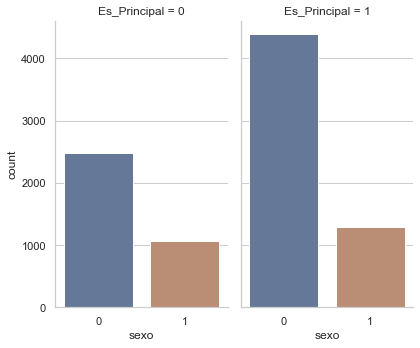

In [163]:
sns.catplot(x="sexo", col="Es_Principal",
                data=data_final, saturation=.5,
                kind="count", ci=None, aspect=.6)

In [164]:
# Modelo Logistico

x = data_final.drop(['Es_Principal'], axis = 1)

In [166]:
y = data_final['Es_Principal']

In [167]:
x_train, x_test, y_train, y_test = train_test_split(
                                        x,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1003,
                                        shuffle      = True
                                    )

Executing shutdown due to inactivity...
Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2021-11-07 01:13:04,072 - INFO     - Executing shutdown due to inactivity...


In [168]:

modelo = sm.Logit(endog=y_train, exog=x_train,)
modelo = modelo.fit()
modelo.summary()

Optimization terminated successfully.
         Current function value: 0.544522
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Es_Principal   No. Observations:                 7382
Model:                          Logit   Df Residuals:                     7368
Method:                           MLE   Df Model:                           13
Date:                Sun, 07 Nov 2021   Pseudo R-squ.:                  0.1826
Time:                        01:14:25   Log-Likelihood:                -4019.7
converged:                       True   LL-Null:                       -4917.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Es_Lima                                            -0.3808      0.056     -6.805      0.000      -0.490      -0.271
sexo                                               -0.5147      0.063     -8.166      0.000      -0.638      -0.391
gap_titulacion                                     -0.0027      0.012     -0.230      0.818      -0.026       0.020
gap_postgrado                                       0.0734      0.003     21.926      0.000       0.067       0.080
nro_post                                            0.5527      0.038     14.388      0.000       0.477       0.628
capac_doc                                          -0.5002      0.059     -8.501      0.000      -0.616      -0.385
evento                                             -0.0317      0.071     -0.444      0.657      -0.172       0.108
cono_compu                                         -0.5719      0.230     -2.487      0.013      -1.023      -0.121
nro_invs                                            0.3398      0.031     11.009      0.000       0.279       0.400
Categ__Sin Ocupacion NOUNI                         -0.1649      0.246     -0.670      0.503      -0.647       0.317
Categ__Empleado                                    -1.7955      0.255     -7.040      0.000      -2.295      -1.296
Categ__Empleador o patrono                         -1.0015      0.326     -3.075      0.002      -1.640      -0.363
Categ__Otro                                        -0.2331      1.271     -0.183      0.855      -2.725       2.259
Categ__Trabajador independiente o por su cuenta    -0.9562      0.258     -3.706      0.000      -1.462      -0.451
===================================================================================================================
"""

Executing shutdown due to inactivity...
Executing shutdown due to inactivity...
Executing shutdown due to inactivity...


2021-11-07 01:16:15,446 - INFO     - Executing shutdown due to inactivity...


In [170]:
x = data_final.drop(['Es_Principal', 'gap_titulacion', 'evento', 'Categ__Sin Ocupacion NOUNI', 'Categ__Otro'], axis = 1)

In [171]:
y =  data_final['Es_Principal']

In [172]:
x_train, x_test, y_train, y_test = train_test_split(
                                        x,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1003,
                                        shuffle      = True
                                    )

In [173]:

modelo = sm.Logit(endog=y_train, exog=x_train,)
modelo = modelo.fit()
modelo.summary()

Optimization terminated successfully.
         Current function value: 0.544578
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Es_Principal   No. Observations:                 7382
Model:                          Logit   Df Residuals:                     7372
Method:                           MLE   Df Model:                            9
Date:                Sun, 07 Nov 2021   Pseudo R-squ.:                  0.1825
Time:                        01:31:56   Log-Likelihood:                -4020.1
converged:                       True   LL-Null:                       -4917.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Es_Lima                                            -0.3879      0.055     -7.004      0.000      -0.497      -0.279
sexo                                               -0.5162      0.063     -8.219      0.000      -0.639      -0.393
gap_postgrado                                       0.0730      0.003     22.303      0.000       0.067       0.079
nro_post                                            0.5464      0.037     14.634      0.000       0.473       0.620
capac_doc                                          -0.5087      0.058     -8.803      0.000      -0.622      -0.395
cono_compu                                         -0.7402      0.092     -8.067      0.000      -0.920      -0.560
nro_invs                                            0.3367      0.031     11.003      0.000       0.277       0.397
Categ__Empleado                                    -1.6318      0.078    -20.940      0.000      -1.785      -1.479
Categ__Empleador o patrono                         -0.8377      0.216     -3.870      0.000      -1.262      -0.414
Categ__Trabajador independiente o por su cuenta    -0.7937      0.080     -9.899      0.000      -0.951      -0.637
===================================================================================================================
"""

In [174]:
data_final.corr()

,Es_Lima,sexo,gap_titulacion,gap_postgrado,nro_post,capac_doc,evento,cono_compu,nro_invs,Es_Principal,Categ__Sin Ocupacion NOUNI,Categ__Empleado,Categ__Empleador o patrono,Categ__Otro,Categ__Trabajador independiente o por su cuenta
Es_Lima,1.000000,0.054922,0.029792,-0.165671,0.023515,-0.039353,0.048655,-0.006654,-0.103601,-0.161000,-0.159418,0.118020,0.036591,-0.006954,0.077498
sexo,0.054922,1.000000,-0.053717,-0.004043,0.082722,0.101198,0.092527,0.018241,0.071835,-0.080604,0.036987,0.026166,-0.027355,0.011693,-0.071542
gap_titulacion,0.029792,-0.053717,1.000000,-0.094529,-0.094870,-0.009943,-0.047043,0.024484,-0.010191,-0.017490,0.077829,-0.131568,-0.003993,-0.000071,0.039819
gap_postgrado,-0.165671,-0.004043,-0.094529,1.000000,-0.047198,0.075836,-0.043297,-0.024472,0.054012,0.291095,0.155817,-0.109716,-0.013769,0.008441,-0.089985
nro_post,0.023515,0.082722,-0.094870,-0.047198,1.000000,0.049783,0.089254,0.040950,0.106180,0.137950,-0.061983,0.065507,0.001394,0.020606,0.011379
capac_doc,-0.039353,0.101198,-0.009943,0.075836,0.049783,1.000000,0.176436,0.037770,0.067444,-0.049866,0.045686,-0.046886,-0.015125,0.015795,-0.006873
evento,0.048655,0.092527,-0.047043,-0.043297,0.089254,0.176436,1.000000,0.050704,0.121730,-0.022440,-0.042934,0.026750,-0.015426,0.010301,0.034735
cono_compu,-0.006654,0.018241,0.024484,-0.024472,0.040950,0.037770,0.050704,1.000000,0.032918,-0.027689,-0.025587,0.002282,0.000707,0.002677,0.032604
nro_invs,-0.103601,0.071835,-0.010191,0.054012,0.106180,0.067444,0.121730,0.032918,1.000000,0.192845,0.146798,-0.153710,-0.023009,0.002537,-0.024762
Es_Principal,-0.161000,-0.080604,-0.017490,0.291095,0.137950,-0.049866,-0.022440,-0.027689,0.192845,1.000000,0.279079,-0.260984,-0.021550,0.005770,-0.089857
